In [6]:
from PIL import Image, ImageDraw
from enum import Enum

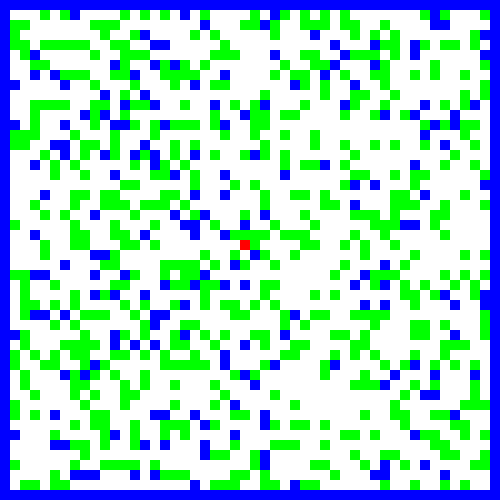

In [7]:
class CardinalDirection(Enum):
    UP = 0
    LEFT = 1
    DOWN = 2
    RIGHT = 3


class GridObject:
    def __init__(self, position: tuple[int, int]):
        self.position = position

    def __repr__(self):
        return f'{self.__class__.__name__}({self.position})'


class EmptySquare(GridObject):
    def __init__(self, position: tuple[int, int]):
        super().__init__(position)


class Obstacle(GridObject):
    def __init__(self, position: tuple[int, int]):
        super().__init__(position)


class Box(Obstacle):
    def __init__(self, x, y):
        super().__init__((x, y))


class Wall(Obstacle):
    def __init__(self, x, y):
        super().__init__((x, y))


class Robot(GridObject):
    def __init__(self, x: int, y: int, commands: list[CardinalDirection]):
        super().__init__((x, y))
        self.commands = commands

    def __repr__(self):
        return f'Robot(p={self.position})'


class Grid:
    MOVEMENT = {
        CardinalDirection.UP: lambda i, j: (i - 1, j),
        CardinalDirection.DOWN: lambda i, j: (i + 1, j),
        CardinalDirection.LEFT: lambda i, j: (i, j - 1),
        CardinalDirection.RIGHT: lambda i, j: (i, j + 1),
    }

    def __init__(self, data: list[list[GridObject]], robot: Robot):
        self.width = len(data[0])
        self.height = len(data)
        self.boxes: list[Box] = []
        self.data = data
        self.robot = robot
        for row in data:
            for grid_object in row:
                if isinstance(grid_object, Box):
                    self.boxes.append(grid_object)

    def move_object(self, direction: CardinalDirection, from_position: tuple[int, int]) -> int:
        """Return the amount of objects moved"""
        try:
            grid_object = self.data[from_position[0]][from_position[1]]
            next_position = Grid.MOVEMENT[direction](*from_position)
            next_object = self.data[next_position[0]][next_position[1]]
        except IndexError:
            return 0

        objects_moved = 0
        if isinstance(next_object, EmptySquare):
            self.data[from_position[0]][from_position[1]] = next_object
            self.data[next_position[0]][next_position[1]] = grid_object
            grid_object.position = next_position
            next_object.position = from_position
            objects_moved += 1
        elif isinstance(next_object, (Box, Robot)):
            objects_moved += self.move_object(direction, next_position)
            if objects_moved > 0:
                self.data[from_position[0]][from_position[1]] = next_object
                self.data[next_position[0]][next_position[1]] = grid_object
                grid_object.position = next_position
                next_object.position = from_position
                objects_moved += 1
        elif isinstance(next_object, Wall):
            return 0
        else:
            raise ValueError(f'Unexpected object type: {type(next_object)}')
        return objects_moved

    def run_robot(self):
        for direction in self.robot.commands:
            self.move_object(direction, self.robot.position)

    def visualize(self, scale=10):
        img = Image.new('RGB', (scale * self.width, scale * self.height), 'black')
        pixels = img.load()

        for i, row in enumerate(self.data):
            for j, grid_object in enumerate(row):
                color = (125, 125, 125)
                if isinstance(grid_object, EmptySquare):
                    color = (255, 255, 255)
                elif isinstance(grid_object, Box):
                    color = (0, 255, 0)
                elif isinstance(grid_object, Robot):
                    color = (255, 0, 0)
                elif isinstance(grid_object, Wall):
                    color = (0, 0, 255)
                for px_i in range(scale):
                    for px_j in range(scale):
                        pixels[scale * j + px_j, scale * i + px_i] = color
        return img


def load_input():
    robot = None
    commands = []
    with open("../../data/day15-input.txt") as f:
        sections = f.read().split('\n\n')
        assert 2 == len(sections)

        for instruction in sections[1].strip().replace('\n', ''):
            if instruction == '^':
                commands.append(CardinalDirection.UP)
            elif instruction == '<':
                commands.append(CardinalDirection.LEFT)
            elif instruction == 'v':
                commands.append(CardinalDirection.DOWN)
            elif instruction == '>':
                commands.append(CardinalDirection.RIGHT)
            else:
                raise ValueError("Unrecognized instruction: " + instruction)

        data = []
        for i, line in enumerate(sections[0].split('\n')):
            row = []
            for j, c in enumerate(line):
                if c == '#':
                    row.append(Wall(i, j))
                elif c == 'O':
                    row.append(Box(i, j))
                elif c == '@':
                    if robot is not None:
                        raise ValueError('Robot already loaded')
                    robot = Robot(i, j, commands)
                    row.append(robot)
                elif c == '.':
                    row.append(EmptySquare((i, j)))
                else:
                    raise ValueError("Unhandled: " + c)
            data.append(row)
        grid = Grid(data, robot)

        return grid


grid = load_input()
grid.visualize(10)

In [8]:

# Somewhere between  1437721 < 1447300 < X < 1484326

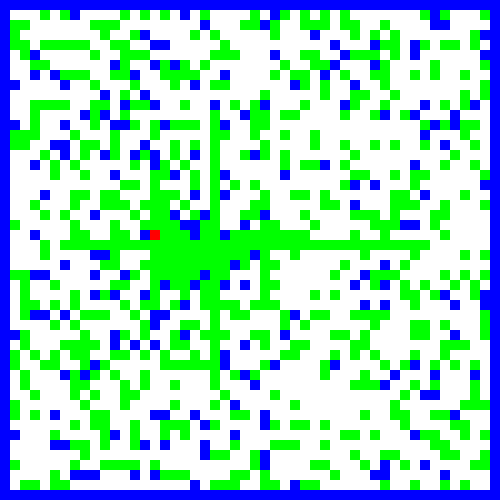

In [9]:
grid.run_robot()
grid.visualize()

In [10]:
box_sum = 0
for i, row in enumerate(grid.data):
    for j, grid_object in enumerate(row):
        if isinstance(grid_object, Box):
            box_sum += 100 * j + i
print(box_sum)


1635645
